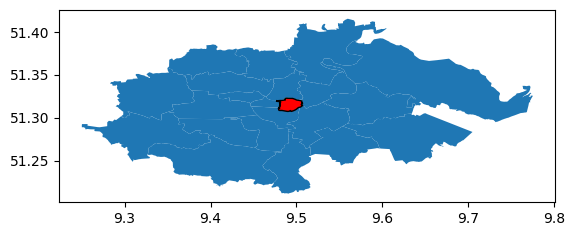

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 183 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Unhandled geometry type: <class 'shapely.geometry.point.Point'>
Unhandled geometry type: <class 'shapely.geometry.point.Point'>
Unhandled geometry type: <class 'shapely.geometry.linestring.LineString'>
Unhandled geometry type: <class 'shapely.geometry.linestring.LineString'>
Unhandled geometry type: <class 'shapely.geometry.linestring.LineString'>


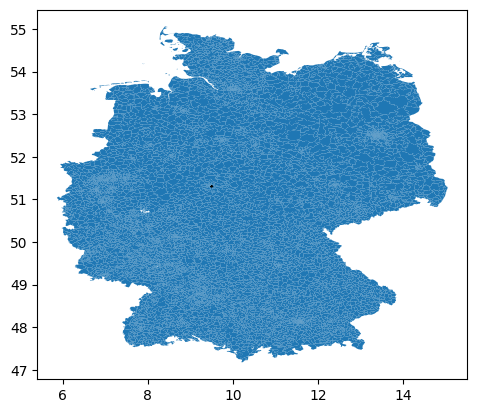

In [43]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon

def handle_multipolygon(multipolygon):
    # Check if it's a MultiPolygon and handle accordingly
    if isinstance(multipolygon, MultiPolygon):
        # Convert MultiPolygon to a list of Polygons
        polygons = [polygon for polygon in multipolygon.geoms]
        return polygons
    elif isinstance(multipolygon, Polygon):
        # If it's a single Polygon, return it in a list
        return [multipolygon]
    else:
        # Handle other cases if needed
        print(f"Unhandled geometry type: {type(multipolygon)}")
        return []

def postal_code_polygon_dict_extractor(place_name):
    # Find Postal Code Polygons for Place
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})

    # Filter by Columns "postal_code" & geometry, to make sure to only get valid Postal Codes of the Place
    polygon_df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    postal_code_polygon_dict = {}

    for _, feature in polygon_df.iterrows():
        postal_code = feature['postal_code']
        geometry = feature['geometry']

        # Check if the geometry is a MultiPolygon and handle it accordingly
        geometries = handle_multipolygon(geometry)

        # Add the geometries to the dictionary
        postal_code_polygon_dict[postal_code] = geometries

    return postal_code_polygon_dict

def plot_all_postal_code_polygons(place_postal_code_polygons, highlight_postal_code=None):
    # Create a GeoDataFrame with all the geometries
    all_geometries = [geometry for geometries in place_postal_code_polygons.values() for geometry in geometries]
    gdf = gpd.GeoDataFrame(geometry=all_geometries)

    # Plot all the postal code polygons
    gdf.plot()

    if highlight_postal_code is not None:
        # Highlight the specified postal code on the Germany plot
        highlight_geometry = place_postal_code_polygons.get(highlight_postal_code, [])
        highlight_gdf = gpd.GeoDataFrame(geometry=highlight_geometry)
        highlight_gdf.plot(color='red', edgecolor='black', ax=plt.gca())

    # Display the map
    plt.show()

# Example usage for Kassel
place_postal_code_polygons_kassel = postal_code_polygon_dict_extractor("Kassel")
plot_all_postal_code_polygons(place_postal_code_polygons_kassel, highlight_postal_code="34117")

# Example usage for Germany
place_postal_code_polygons_germany = postal_code_polygon_dict_extractor("Germany")
highlight_postal_code_germany = "34117"
plot_all_postal_code_polygons(place_postal_code_polygons_germany, highlight_postal_code=highlight_postal_code_germany)


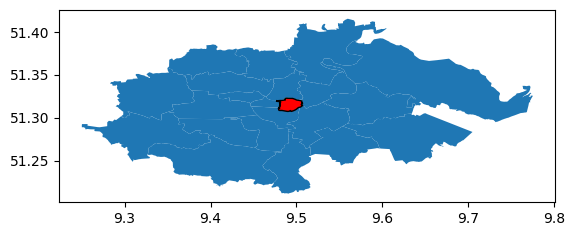

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 183 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Unhandled geometry type: <class 'shapely.geometry.point.Point'>
Unhandled geometry type: <class 'shapely.geometry.point.Point'>
Unhandled geometry type: <class 'shapely.geometry.linestring.LineString'>
Unhandled geometry type: <class 'shapely.geometry.linestring.LineString'>
Unhandled geometry type: <class 'shapely.geometry.linestring.LineString'>


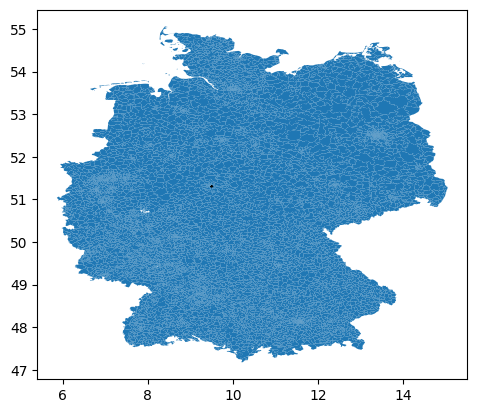

In [45]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon

def handle_multipolygon(multipolygon):
    # Check if it's a MultiPolygon and handle accordingly
    if isinstance(multipolygon, MultiPolygon):
        # Convert MultiPolygon to a list of Polygons
        polygons = [polygon for polygon in multipolygon.geoms]
        return polygons
    elif isinstance(multipolygon, Polygon):
        # If it's a single Polygon, return it in a list
        return [multipolygon]
    else:
        # Handle other cases if needed
        print(f"Unhandled geometry type: {type(multipolygon)}")
        return []

def postal_code_polygon_dict_extractor(place_name):
    # Find Postal Code Polygons for Place
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})

    # Convert to GeoDataFrame
    gdf = gpd.GeoDataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    postal_code_polygon_dict = {}

    for _, feature in gdf.iterrows():
        postal_code = feature['postal_code']
        geometry = feature['geometry']

        # Check if the geometry is a MultiPolygon and handle it accordingly
        geometries = handle_multipolygon(geometry)

        # Add the geometries to the dictionary
        postal_code_polygon_dict[postal_code] = geometries

    return postal_code_polygon_dict

def plot_all_postal_code_polygons(place_postal_code_polygons, highlight_postal_code=None):
    # Create a GeoDataFrame with all the geometries
    all_geometries = [geometry for geometries in place_postal_code_polygons.values() for geometry in geometries]
    gdf = gpd.GeoDataFrame(geometry=all_geometries)

    # Plot all the postal code polygons
    gdf.plot()

    if highlight_postal_code is not None:
        # Highlight the specified postal code on the Germany plot
        highlight_geometry = place_postal_code_polygons.get(highlight_postal_code, [])
        highlight_gdf = gpd.GeoDataFrame(geometry=highlight_geometry)
        highlight_gdf.plot(color='red', edgecolor='black', ax=plt.gca())

    # Display the map
    plt.show()

# Example usage for Kassel
place_postal_code_polygons_kassel = postal_code_polygon_dict_extractor("Kassel")
plot_all_postal_code_polygons(place_postal_code_polygons_kassel, highlight_postal_code="34117")

# Example usage for Germany
place_postal_code_polygons_germany = postal_code_polygon_dict_extractor("Germany")
highlight_postal_code_germany = "34117"
plot_all_postal_code_polygons(place_postal_code_polygons_germany, highlight_postal_code=highlight_postal_code_germany)


In [46]:
place_postal_code_polygons_germany

{'87437': [<POLYGON ((10.301 47.767, 10.301 47.768, 10.301 47.767, 10.302 47.767, 10.30...>],
 '87439': [<POLYGON ((10.237 47.77, 10.237 47.771, 10.237 47.771, 10.238 47.771, 10.238...>],
 '87435': [<POLYGON ((10.274 47.708, 10.274 47.708, 10.275 47.708, 10.275 47.708, 10.27...>],
 '87488': [<POLYGON ((10.373 47.714, 10.373 47.714, 10.373 47.714, 10.374 47.714, 10.37...>],
 '87527': [<POLYGON ((10.195 47.479, 10.195 47.479, 10.196 47.479, 10.196 47.48, 10.196...>],
 '87538': [<POLYGON ((10.057 47.466, 10.058 47.466, 10.058 47.466, 10.058 47.466, 10.05...>],
 '87616': [<POLYGON ((10.526 47.678, 10.526 47.679, 10.526 47.679, 10.526 47.679, 10.52...>],
 '87637': [<POLYGON ((10.545 47.644, 10.545 47.644, 10.545 47.644, 10.545 47.645, 10.54...>],
 '87675': [<POLYGON ((10.662 47.695, 10.662 47.695, 10.662 47.695, 10.662 47.695, 10.66...>],
 '88167': [<POLYGON ((9.921 47.613, 9.92 47.614, 9.92 47.614, 9.92 47.615, 9.92 47.615,...>],
 '88316': [<POLYGON ((9.985 47.752, 9.985 47.752, 9.986 47.7